In [1]:
from main import *
from bovw import *
from plotting import *

In [2]:
import os
import random
import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt

In [3]:
SEED = 42

random.seed(SEED)
np.random.seed(SEED)
os.environ["PYTHONHASHSEED"] = str(SEED)

In [4]:
data_train = Dataset(ImageFolder="../data/places_reduced/train")
data_test = Dataset(ImageFolder="../data/places_reduced/val")

len(data_train), len(data_test)

(8700, 2200)

In [5]:
random.shuffle(data_train)
random.shuffle(data_test)

In [ ]:
# Experiment 1: Linear kernel with different C values
kernel_results = {}

bovw_params = {
    "detector_type": "SIFT",
    "codebook_size": 512,
    "detector_kwargs": {"nfeatures": 1000},
}

print("=" * 60)
print("EXPERIMENT 1: LINEAR KERNEL + C VALUES")
print("=" * 60)

for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    print(f"\n=== Testing Linear SVM with kernel={kernel} ===")
    
    classifier_cls = SVC
    classifier_params = {
        "kernel": kernel,
        "class_weight": "balanced",
        "random_state": SEED,
    }
    
    scores = cross_validate_bovw(
        dataset=data_train,
        bovw_kwargs=bovw_params,
        classifier_cls=classifier_cls,
        classifier_kwargs=classifier_params,
        n_splits=5
    )
    
    kernel_results[kernel] = scores
    print(f"kernel={kernel} -> Test Accuracy: {scores.val.accuracy.mean:.4f} ± {scores.val.accuracy.std:.4f}")


print("\n" + "=" * 60)
print("LINEAR KERNEL: kernel COMPARISON")
print("=" * 60)
for C, result in kernel_results.items():
    print(f"kernel={kernel} -> Train: {result.train.accuracy.mean:.4f} ± {result.train.accuracy.std:.4f} | Test: {result.val.accuracy.mean:.4f} ± {result.val.accuracy.std:.4f}")

EXPERIMENT 1: LINEAR KERNEL + C VALUES

=== Testing Linear SVM with kernel=linear ===


Phase [Setup]: Extracting the descriptors:  49%|████▉     | 4272/8700 [00:01<00:01, 2340.35it/s]

Could not compute descriptors for image ../data/places_reduced/train/water_ice_snow/iceberg_00000023.jpg of class 9.


Phase [Setup]: Extracting the descriptors: 100%|██████████| 8700/8700 [00:03<00:00, 2323.53it/s]


Could not compute descriptors for image ../data/places_reduced/train/mountains_hills_desert_sky/sky_00001410.jpg of class 5.


100%|██████████| 5/5 [01:26<00:00, 17.24s/it]


kernel=linear -> Test Accuracy: 0.3262 ± 0.0083

=== Testing Linear SVM with kernel=poly ===


Phase [Setup]: Extracting the descriptors:  50%|█████     | 4372/8700 [00:01<00:01, 2628.70it/s]

Could not compute descriptors for image ../data/places_reduced/train/water_ice_snow/iceberg_00000023.jpg of class 9.


Phase [Setup]: Extracting the descriptors: 100%|██████████| 8700/8700 [00:03<00:00, 2646.57it/s]


Could not compute descriptors for image ../data/places_reduced/train/mountains_hills_desert_sky/sky_00001410.jpg of class 5.


100%|██████████| 5/5 [01:38<00:00, 19.64s/it]


kernel=poly -> Test Accuracy: 0.3294 ± 0.0138

=== Testing Linear SVM with kernel=rbf ===


Phase [Setup]: Extracting the descriptors:  50%|████▉     | 4336/8700 [00:01<00:01, 2535.42it/s]

Could not compute descriptors for image ../data/places_reduced/train/water_ice_snow/iceberg_00000023.jpg of class 9.


Phase [Setup]: Extracting the descriptors: 100%|██████████| 8700/8700 [00:03<00:00, 2645.32it/s]


Could not compute descriptors for image ../data/places_reduced/train/mountains_hills_desert_sky/sky_00001410.jpg of class 5.


100%|██████████| 5/5 [01:58<00:00, 23.78s/it]


kernel=rbf -> Test Accuracy: 0.3455 ± 0.0076

=== Testing Linear SVM with kernel=sigmoid ===


Phase [Setup]: Extracting the descriptors:  50%|█████     | 4389/8700 [00:01<00:01, 2723.55it/s]

Could not compute descriptors for image ../data/places_reduced/train/water_ice_snow/iceberg_00000023.jpg of class 9.


Phase [Setup]: Extracting the descriptors: 100%|██████████| 8700/8700 [00:03<00:00, 2677.84it/s]


Could not compute descriptors for image ../data/places_reduced/train/mountains_hills_desert_sky/sky_00001410.jpg of class 5.


100%|██████████| 5/5 [01:32<00:00, 18.48s/it]

kernel=sigmoid -> Test Accuracy: 0.2767 ± 0.0058

LINEAR KERNEL: kernel COMPARISON


ValueError: Unknown format code 'f' for object of type 'str'

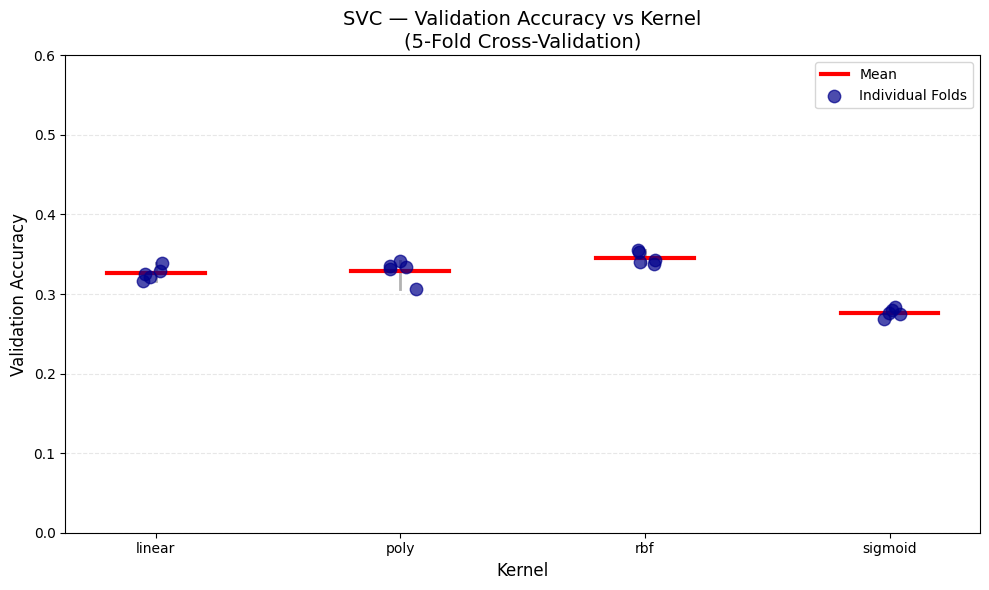

In [8]:
x_vals = ['linear', 'poly', 'rbf', 'sigmoid']
printable_x_vals = ['linear', 'poly', 'rbf', 'sigmoid']
test_vals = [kernel_results[key].val.accuracy.all for key in x_vals]
# train_vals = [kernel_results[key].train.accuracy.all for key in x_vals]
plot_cv_accuracy_boxplot(printable_x_vals, test_vals, "SVC", "Kernel", ylim=(0.0, 0.6))

In [9]:
# Experiment 1: Linear kernel with different C values
linear_c_results = {}

bovw_params = {
    "detector_type": "SIFT",
    "codebook_size": 512,
    "detector_kwargs": {"nfeatures": 1000},
}

print("=" * 60)
print("EXPERIMENT 1: LINEAR KERNEL + C VALUES")
print("=" * 60)

for C in [0.01, 0.1, 1.0, 10.0, 100.0]:
    print(f"\n=== Testing Linear SVM with C={C} ===")
    
    classifier_cls = SVC
    classifier_params = {
        "kernel": "linear",
        "C": C,
        "class_weight": "balanced",
        "random_state": SEED,
    }
    
    scores = cross_validate_bovw(
        dataset=data_train,
        bovw_kwargs=bovw_params,
        classifier_cls=classifier_cls,
        classifier_kwargs=classifier_params,
        n_splits=5
    )
    
    linear_c_results[C] = scores
    print(f"C={C} -> Test Accuracy: {scores.val.accuracy.mean:.4f} ± {scores.val.accuracy.std:.4f}")


print("\n" + "=" * 60)
print("LINEAR KERNEL: C COMPARISON")
print("=" * 60)
for C, result in linear_c_results.items():
    print(f"C={C:6.2f} -> Train: {result.train.accuracy.mean:.4f} ± {result.train.accuracy.std:.4f} | Test: {result.val.accuracy.mean:.4f} ± {result.val.accuracy.std:.4f}")

EXPERIMENT 1: LINEAR KERNEL + C VALUES

=== Testing Linear SVM with C=0.01 ===


Phase [Setup]: Extracting the descriptors:  50%|█████     | 4381/8700 [00:01<00:01, 2727.84it/s]

Could not compute descriptors for image ../data/places_reduced/train/water_ice_snow/iceberg_00000023.jpg of class 9.


Phase [Setup]: Extracting the descriptors: 100%|██████████| 8700/8700 [00:03<00:00, 2679.57it/s]


Could not compute descriptors for image ../data/places_reduced/train/mountains_hills_desert_sky/sky_00001410.jpg of class 5.


  0%|          | 0/5 [00:00<?, ?it/s]/home/arnau-marcos-almansa/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/arnau-marcos-almansa/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
 20%|██        | 1/5 [00:19<01:18, 19.68s/it]/home/arnau-marcos-almansa/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division

C=0.01 -> Test Accuracy: 0.1700 ± 0.0699

=== Testing Linear SVM with C=0.1 ===


Phase [Setup]: Extracting the descriptors:  50%|█████     | 4351/8700 [00:01<00:01, 2648.77it/s]

Could not compute descriptors for image ../data/places_reduced/train/water_ice_snow/iceberg_00000023.jpg of class 9.


Phase [Setup]: Extracting the descriptors: 100%|██████████| 8700/8700 [00:03<00:00, 2666.70it/s]


Could not compute descriptors for image ../data/places_reduced/train/mountains_hills_desert_sky/sky_00001410.jpg of class 5.


100%|██████████| 5/5 [01:35<00:00, 19.03s/it]


C=0.1 -> Test Accuracy: 0.3043 ± 0.0095

=== Testing Linear SVM with C=1.0 ===


Phase [Setup]: Extracting the descriptors:  50%|█████     | 4380/8700 [00:01<00:01, 2698.55it/s]

Could not compute descriptors for image ../data/places_reduced/train/water_ice_snow/iceberg_00000023.jpg of class 9.


Phase [Setup]: Extracting the descriptors: 100%|██████████| 8700/8700 [00:03<00:00, 2681.00it/s]


Could not compute descriptors for image ../data/places_reduced/train/mountains_hills_desert_sky/sky_00001410.jpg of class 5.


100%|██████████| 5/5 [01:25<00:00, 17.03s/it]


C=1.0 -> Test Accuracy: 0.3300 ± 0.0062

=== Testing Linear SVM with C=10.0 ===


Phase [Setup]: Extracting the descriptors:  50%|████▉     | 4332/8700 [00:01<00:01, 2664.85it/s]

Could not compute descriptors for image ../data/places_reduced/train/water_ice_snow/iceberg_00000023.jpg of class 9.


Phase [Setup]: Extracting the descriptors: 100%|██████████| 8700/8700 [00:03<00:00, 2638.81it/s]


Could not compute descriptors for image ../data/places_reduced/train/mountains_hills_desert_sky/sky_00001410.jpg of class 5.


100%|██████████| 5/5 [01:22<00:00, 16.53s/it]


C=10.0 -> Test Accuracy: 0.2874 ± 0.0122

=== Testing Linear SVM with C=100.0 ===


Phase [Setup]: Extracting the descriptors:  50%|█████     | 4379/8700 [00:01<00:01, 2703.74it/s]

Could not compute descriptors for image ../data/places_reduced/train/water_ice_snow/iceberg_00000023.jpg of class 9.


Phase [Setup]: Extracting the descriptors: 100%|██████████| 8700/8700 [00:03<00:00, 2689.52it/s]


Could not compute descriptors for image ../data/places_reduced/train/mountains_hills_desert_sky/sky_00001410.jpg of class 5.


100%|██████████| 5/5 [01:45<00:00, 21.09s/it]

C=100.0 -> Test Accuracy: 0.2648 ± 0.0100

LINEAR KERNEL: C COMPARISON
C=  0.01 -> Train: 0.1806 ± 0.0798 | Test: 0.1700 ± 0.0699
C=  0.10 -> Train: 0.3381 ± 0.0021 | Test: 0.3043 ± 0.0095
C=  1.00 -> Train: 0.4803 ± 0.0030 | Test: 0.3300 ± 0.0062
C= 10.00 -> Train: 0.6287 ± 0.0060 | Test: 0.2874 ± 0.0122
C=100.00 -> Train: 0.8067 ± 0.0078 | Test: 0.2648 ± 0.0100


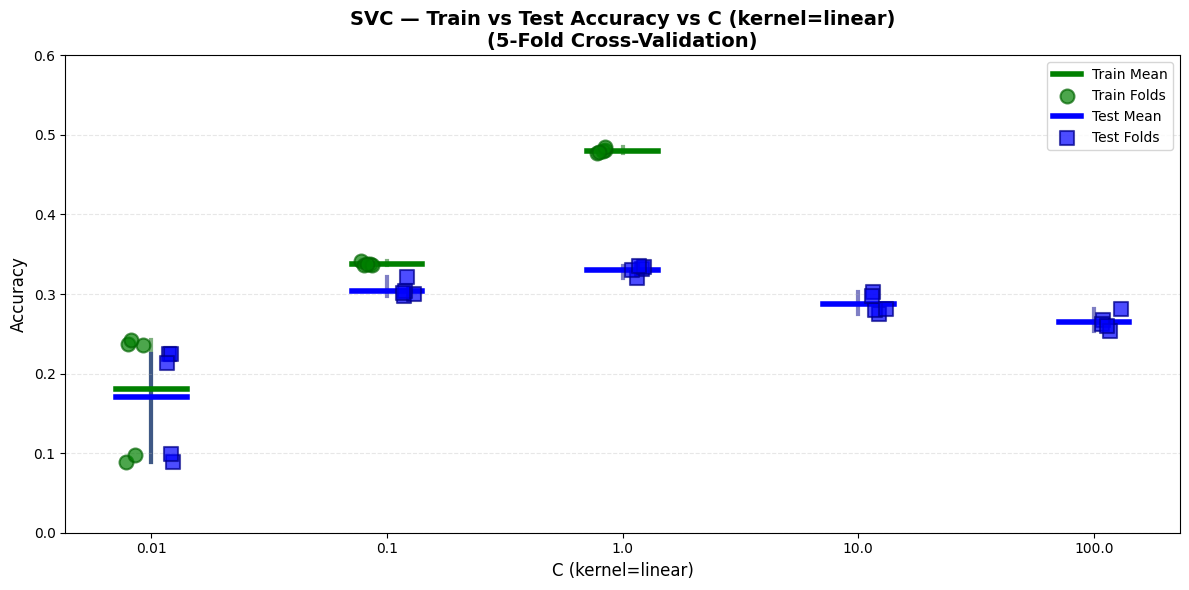

In [ ]:
x_vals = [0.01, 0.1, 1.0, 10.0, 100.0]
printable_x_vals = [0.01, 0.1, 1.0, 10.0, 100.0]
test_vals = [linear_c_results[key].val.accuracy.all for key in x_vals]
train_vals = [linear_c_results[key].train.accuracy.all for key in x_vals]
plot_cv_train_test_comparison(printable_x_vals, train_vals, test_vals, "SVC", "C (kernel=linear)", ylim=(0.0, 0.6))

In [13]:
# Experiment 2: RBF kernel with different C values
rbf_c_results = {}

bovw_params = {
    "detector_type": "SIFT",
    "codebook_size": 512,
    "detector_kwargs": {"nfeatures": 1000},
}

print("=" * 60)
print("EXPERIMENT 2: RBF KERNEL + C VALUES")
print("=" * 60)

for C in [0.01, 0.1, 1.0, 10.0, 100.0]:
    print(f"\n=== Testing RBF SVM with C={C} ===")
    
    classifier_cls = SVC
    classifier_params = {
        "kernel": "rbf",
        "C": C,
        "gamma": "scale",
        "class_weight": "balanced",
        "random_state": SEED,
    }
    
    scores = cross_validate_bovw(
        dataset=data_train,
        bovw_kwargs=bovw_params,
        classifier_cls=classifier_cls,
        classifier_kwargs=classifier_params,
        n_splits=5
    )
    
    rbf_c_results[C] = scores
    print(f"C={C} -> Test Accuracy: {scores.val.accuracy.mean:.4f} ± {scores.val.accuracy.std:.4f}")


print("\n" + "=" * 60)
print("RBF KERNEL: C COMPARISON")
print("=" * 60)
for C, result in rbf_c_results.items():
    print(f"C={C:6.2f} -> Train: {result.train.accuracy.mean:.4f} ± {result.train.accuracy.std:.4f} | Test: {result.val.accuracy.mean:.4f} ± {result.val.accuracy.std:.4f}")

EXPERIMENT 2: RBF KERNEL + C VALUES

=== Testing RBF SVM with C=0.01 ===


Phase [Setup]: Extracting the descriptors:  50%|█████     | 4386/8700 [00:01<00:01, 2488.41it/s]

Could not compute descriptors for image ../data/places_reduced/train/water_ice_snow/iceberg_00000023.jpg of class 9.


Phase [Setup]: Extracting the descriptors: 100%|██████████| 8700/8700 [00:03<00:00, 2532.33it/s]


Could not compute descriptors for image ../data/places_reduced/train/mountains_hills_desert_sky/sky_00001410.jpg of class 5.


  0%|          | 0/5 [00:00<?, ?it/s]/home/arnau-marcos-almansa/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/arnau-marcos-almansa/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
 20%|██        | 1/5 [00:24<01:39, 25.00s/it]/home/arnau-marcos-almansa/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division

C=0.01 -> Test Accuracy: 0.1670 ± 0.0793

=== Testing RBF SVM with C=0.1 ===


Phase [Setup]: Extracting the descriptors:  50%|████▉     | 4320/8700 [00:01<00:01, 2576.49it/s]

Could not compute descriptors for image ../data/places_reduced/train/water_ice_snow/iceberg_00000023.jpg of class 9.


Phase [Setup]: Extracting the descriptors: 100%|██████████| 8700/8700 [00:03<00:00, 2645.89it/s]


Could not compute descriptors for image ../data/places_reduced/train/mountains_hills_desert_sky/sky_00001410.jpg of class 5.


100%|██████████| 5/5 [02:02<00:00, 24.48s/it]


C=0.1 -> Test Accuracy: 0.2952 ± 0.0090

=== Testing RBF SVM with C=1.0 ===


Phase [Setup]: Extracting the descriptors:  50%|████▉     | 4339/8700 [00:01<00:01, 2684.50it/s]

Could not compute descriptors for image ../data/places_reduced/train/water_ice_snow/iceberg_00000023.jpg of class 9.


Phase [Setup]: Extracting the descriptors: 100%|██████████| 8700/8700 [00:03<00:00, 2665.20it/s]


Could not compute descriptors for image ../data/places_reduced/train/mountains_hills_desert_sky/sky_00001410.jpg of class 5.


100%|██████████| 5/5 [01:54<00:00, 22.98s/it]


C=1.0 -> Test Accuracy: 0.3426 ± 0.0115

=== Testing RBF SVM with C=10.0 ===


Phase [Setup]: Extracting the descriptors:  50%|█████     | 4361/8700 [00:01<00:01, 2679.74it/s]

Could not compute descriptors for image ../data/places_reduced/train/water_ice_snow/iceberg_00000023.jpg of class 9.


Phase [Setup]: Extracting the descriptors: 100%|██████████| 8700/8700 [00:03<00:00, 2679.55it/s]


Could not compute descriptors for image ../data/places_reduced/train/mountains_hills_desert_sky/sky_00001410.jpg of class 5.


100%|██████████| 5/5 [02:06<00:00, 25.31s/it]


C=10.0 -> Test Accuracy: 0.3247 ± 0.0084

=== Testing RBF SVM with C=100.0 ===


Phase [Setup]: Extracting the descriptors:  50%|█████     | 4368/8700 [00:01<00:01, 2710.56it/s]

Could not compute descriptors for image ../data/places_reduced/train/water_ice_snow/iceberg_00000023.jpg of class 9.


Phase [Setup]: Extracting the descriptors: 100%|██████████| 8700/8700 [00:03<00:00, 2684.62it/s]


Could not compute descriptors for image ../data/places_reduced/train/mountains_hills_desert_sky/sky_00001410.jpg of class 5.


100%|██████████| 5/5 [02:03<00:00, 24.72s/it]

C=100.0 -> Test Accuracy: 0.3251 ± 0.0053

RBF KERNEL: C COMPARISON
C=  0.01 -> Train: 0.1903 ± 0.1003 | Test: 0.1670 ± 0.0793
C=  0.10 -> Train: 0.3598 ± 0.0042 | Test: 0.2952 ± 0.0090
C=  1.00 -> Train: 0.7739 ± 0.0085 | Test: 0.3426 ± 0.0115
C= 10.00 -> Train: 0.9999 ± 0.0001 | Test: 0.3247 ± 0.0084
C=100.00 -> Train: 1.0000 ± 0.0000 | Test: 0.3251 ± 0.0053


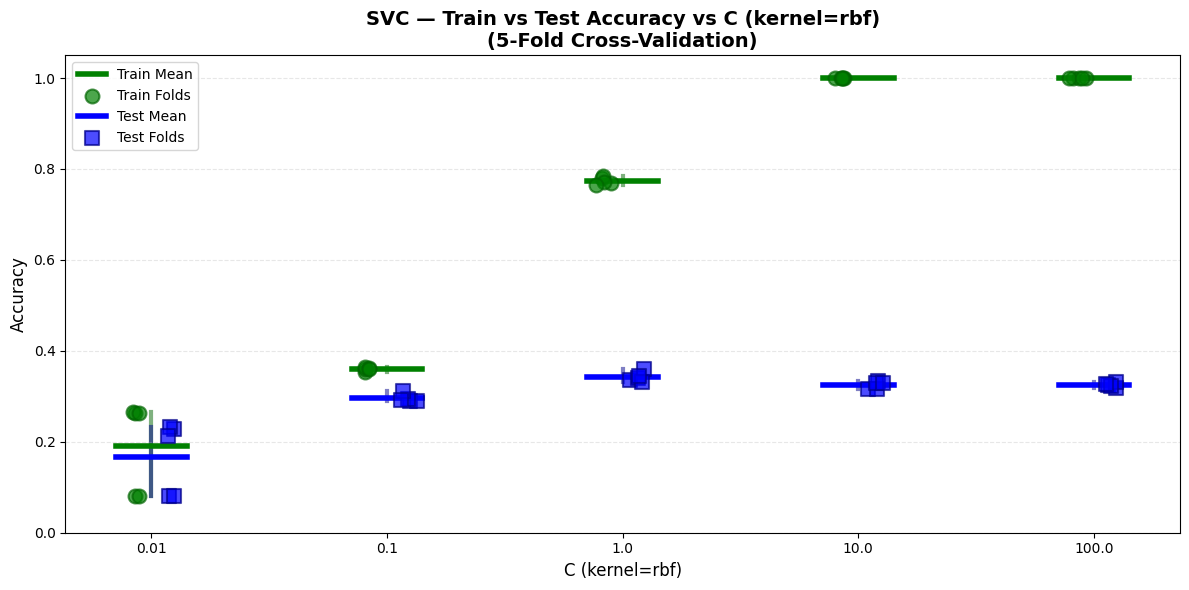

In [16]:
x_vals = [0.01, 0.1, 1.0, 10.0, 100.0]
printable_x_vals = [0.01, 0.1, 1.0, 10.0, 100.0]
test_vals = [rbf_c_results[key].val.accuracy.all for key in x_vals]
train_vals = [rbf_c_results[key].train.accuracy.all for key in x_vals]
plot_cv_train_test_comparison(printable_x_vals, train_vals, test_vals, "SVC", "C (kernel=rbf)", ylim=(0.0, 1.05))

In [17]:
# Experiment 3: Polynomial kernel with different C values
poly_c_results = {}

bovw_params = {
    "detector_type": "SIFT",
    "codebook_size": 512,
    "detector_kwargs": {"nfeatures": 1000},
}

print("=" * 60)
print("EXPERIMENT 3: POLYNOMIAL KERNEL + C VALUES")
print("=" * 60)

for C in [0.01, 0.1, 1.0, 10.0, 100.0]:
    print(f"\n=== Testing Poly SVM with C={C} ===")
    
    classifier_cls = SVC
    classifier_params = {
        "kernel": "poly",
        "degree": 3,  # cubic polynomial
        "C": C,
        "gamma": "scale",
        "class_weight": "balanced",
        "random_state": SEED,
    }
    
    scores = cross_validate_bovw(
        dataset=data_train,
        bovw_kwargs=bovw_params,
        classifier_cls=classifier_cls,
        classifier_kwargs=classifier_params,
        n_splits=5
    )
    
    poly_c_results[C] = scores
    print(f"C={C} -> Test Accuracy: {scores.val.accuracy.mean:.4f} ± {scores.val.accuracy.std:.4f}")


print("\n" + "=" * 60)
print("POLYNOMIAL KERNEL: C COMPARISON")
print("=" * 60)
for C, result in poly_c_results.items():
    print(f"C={C:6.2f} -> Train: {result.train.accuracy.mean:.4f} ± {result.train.accuracy.std:.4f} | Test: {result.val.accuracy.mean:.4f} ± {result.val.accuracy.std:.4f}")

EXPERIMENT 3: POLYNOMIAL KERNEL + C VALUES

=== Testing Poly SVM with C=0.01 ===


Phase [Setup]: Extracting the descriptors:  50%|█████     | 4353/8700 [00:01<00:01, 2702.16it/s]

Could not compute descriptors for image ../data/places_reduced/train/water_ice_snow/iceberg_00000023.jpg of class 9.


Phase [Setup]: Extracting the descriptors: 100%|██████████| 8700/8700 [00:03<00:00, 2675.42it/s]


Could not compute descriptors for image ../data/places_reduced/train/mountains_hills_desert_sky/sky_00001410.jpg of class 5.


  0%|          | 0/5 [00:00<?, ?it/s]/home/arnau-marcos-almansa/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/arnau-marcos-almansa/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
 20%|██        | 1/5 [00:19<01:18, 19.58s/it]/home/arnau-marcos-almansa/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division

C=0.01 -> Test Accuracy: 0.2371 ± 0.0322

=== Testing Poly SVM with C=0.1 ===


Phase [Setup]: Extracting the descriptors:  50%|█████     | 4362/8700 [00:01<00:01, 2700.15it/s]

Could not compute descriptors for image ../data/places_reduced/train/water_ice_snow/iceberg_00000023.jpg of class 9.


Phase [Setup]: Extracting the descriptors: 100%|██████████| 8700/8700 [00:03<00:00, 2682.72it/s]


Could not compute descriptors for image ../data/places_reduced/train/mountains_hills_desert_sky/sky_00001410.jpg of class 5.


100%|██████████| 5/5 [01:31<00:00, 18.20s/it]


C=0.1 -> Test Accuracy: 0.3248 ± 0.0075

=== Testing Poly SVM with C=1.0 ===


Phase [Setup]: Extracting the descriptors:  50%|█████     | 4353/8700 [00:01<00:01, 2698.21it/s]

Could not compute descriptors for image ../data/places_reduced/train/water_ice_snow/iceberg_00000023.jpg of class 9.


Phase [Setup]: Extracting the descriptors: 100%|██████████| 8700/8700 [00:03<00:00, 2674.70it/s]


Could not compute descriptors for image ../data/places_reduced/train/mountains_hills_desert_sky/sky_00001410.jpg of class 5.


100%|██████████| 5/5 [01:36<00:00, 19.40s/it]


C=1.0 -> Test Accuracy: 0.3316 ± 0.0122

=== Testing Poly SVM with C=10.0 ===


Phase [Setup]: Extracting the descriptors:  49%|████▉     | 4306/8700 [00:01<00:01, 2608.97it/s]

Could not compute descriptors for image ../data/places_reduced/train/water_ice_snow/iceberg_00000023.jpg of class 9.


Phase [Setup]: Extracting the descriptors: 100%|██████████| 8700/8700 [00:03<00:00, 2654.52it/s]


Could not compute descriptors for image ../data/places_reduced/train/mountains_hills_desert_sky/sky_00001410.jpg of class 5.


100%|██████████| 5/5 [01:35<00:00, 19.18s/it]


C=10.0 -> Test Accuracy: 0.3220 ± 0.0081

=== Testing Poly SVM with C=100.0 ===


Phase [Setup]: Extracting the descriptors:  51%|█████     | 4403/8700 [00:01<00:01, 2716.69it/s]

Could not compute descriptors for image ../data/places_reduced/train/water_ice_snow/iceberg_00000023.jpg of class 9.


Phase [Setup]: Extracting the descriptors: 100%|██████████| 8700/8700 [00:03<00:00, 2682.23it/s]


Could not compute descriptors for image ../data/places_reduced/train/mountains_hills_desert_sky/sky_00001410.jpg of class 5.


100%|██████████| 5/5 [01:37<00:00, 19.46s/it]

C=100.0 -> Test Accuracy: 0.3239 ± 0.0105

POLYNOMIAL KERNEL: C COMPARISON
C=  0.01 -> Train: 0.2712 ± 0.0490 | Test: 0.2371 ± 0.0322
C=  0.10 -> Train: 0.5064 ± 0.0065 | Test: 0.3248 ± 0.0075
C=  1.00 -> Train: 0.9979 ± 0.0007 | Test: 0.3316 ± 0.0122
C= 10.00 -> Train: 1.0000 ± 0.0000 | Test: 0.3220 ± 0.0081
C=100.00 -> Train: 1.0000 ± 0.0000 | Test: 0.3239 ± 0.0105


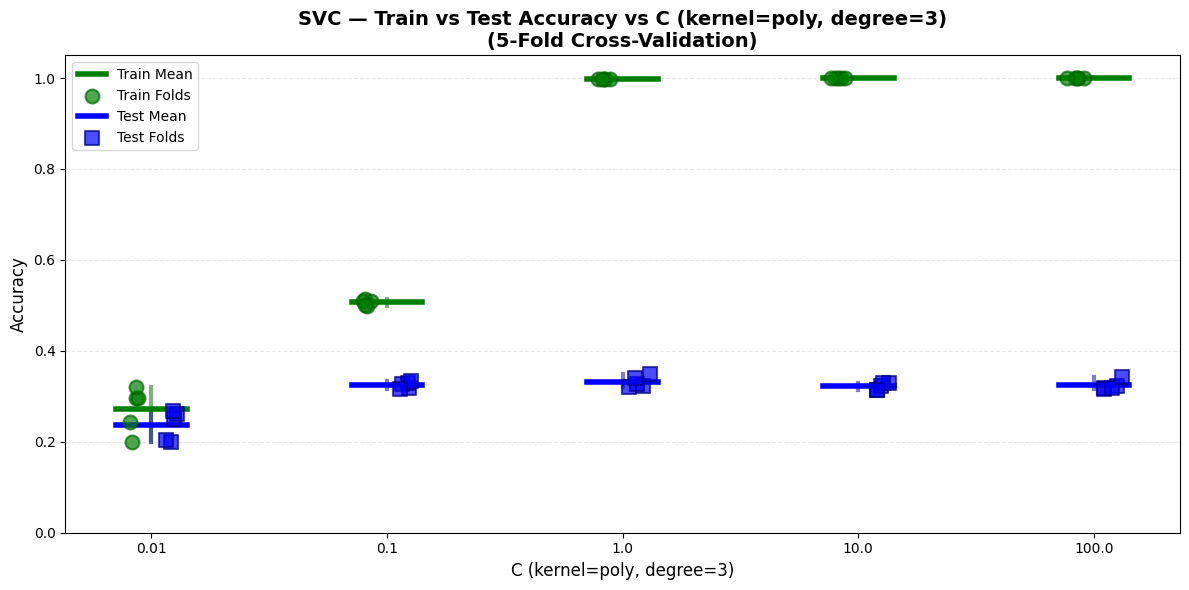

In [18]:
x_vals = [0.01, 0.1, 1.0, 10.0, 100.0]
printable_x_vals = [0.01, 0.1, 1.0, 10.0, 100.0]
test_vals = [poly_c_results[key].val.accuracy.all for key in x_vals]
train_vals = [poly_c_results[key].train.accuracy.all for key in x_vals]
plot_cv_train_test_comparison(printable_x_vals, train_vals, test_vals, "SVC", "C (kernel=poly, degree=3)", ylim=(0.0, 1.05))

In [19]:
# Summary: Compare all kernels at their best C values
print("=" * 80)
print("SUMMARY: ALL KERNELS COMPARISON")
print("=" * 80)

print("\nLINEAR KERNEL:")
for C, result in linear_c_results.items():
    print(f"  C={C:6.2f} -> Test: {result.val.accuracy.mean:.4f} ± {result.val.accuracy.std:.4f}")

print("\nRBF KERNEL:")
for C, result in rbf_c_results.items():
    print(f"  C={C:6.2f} -> Test: {result.val.accuracy.mean:.4f} ± {result.val.accuracy.std:.4f}")

print("\nPOLYNOMIAL KERNEL:")
for C, result in poly_c_results.items():
    print(f"  C={C:6.2f} -> Test: {result.val.accuracy.mean:.4f} ± {result.val.accuracy.std:.4f}")

# Find best configuration
best_acc = 0
best_config = None

for C, result in linear_c_results.items():
    if result.val.accuracy.mean > best_acc:
        best_acc = result.val.accuracy.mean
        best_config = ("linear", C, result)

for C, result in rbf_c_results.items():
    if result.val.accuracy.mean > best_acc:
        best_acc = result.val.accuracy.mean
        best_config = ("rbf", C, result)

for C, result in poly_c_results.items():
    if result.val.accuracy.mean > best_acc:
        best_acc = result.val.accuracy.mean
        best_config = ("poly", C, result)

print("\n" + "=" * 80)
print("BEST CONFIGURATION:")
print("=" * 80)
if best_config:
    kernel, C, result = best_config
    print(f"Kernel: {kernel}")
    print(f"C: {C}")
    print(f"Test Accuracy: {result.val.accuracy.mean:.4f} ± {result.val.accuracy.std:.4f}")
    print(f"Train Accuracy: {result.train.accuracy.mean:.4f} ± {result.train.accuracy.std:.4f}")
    print(f"Test F1: {result.val.f1.mean:.4f} ± {result.val.f1.std:.4f}")

SUMMARY: ALL KERNELS COMPARISON

LINEAR KERNEL:
  C=  0.01 -> Test: 0.1700 ± 0.0699
  C=  0.10 -> Test: 0.3043 ± 0.0095
  C=  1.00 -> Test: 0.3300 ± 0.0062
  C= 10.00 -> Test: 0.2874 ± 0.0122
  C=100.00 -> Test: 0.2648 ± 0.0100

RBF KERNEL:
  C=  0.01 -> Test: 0.1670 ± 0.0793
  C=  0.10 -> Test: 0.2952 ± 0.0090
  C=  1.00 -> Test: 0.3426 ± 0.0115
  C= 10.00 -> Test: 0.3247 ± 0.0084
  C=100.00 -> Test: 0.3251 ± 0.0053

POLYNOMIAL KERNEL:
  C=  0.01 -> Test: 0.2371 ± 0.0322
  C=  0.10 -> Test: 0.3248 ± 0.0075
  C=  1.00 -> Test: 0.3316 ± 0.0122
  C= 10.00 -> Test: 0.3220 ± 0.0081
  C=100.00 -> Test: 0.3239 ± 0.0105

BEST CONFIGURATION:
Kernel: rbf
C: 1.0
Test Accuracy: 0.3426 ± 0.0115
Train Accuracy: 0.7739 ± 0.0085
Test F1: 0.3350 ± 0.0120
